In [1]:
from math import e
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.core.display import HTML

#variabili utili

small = 0
medium_low = 0
medium_high = 0
ict = 0
hightech_noict = 0
south = 0
hightech = 0
industrial = 0
big_exp = 0
medium_exp = 0

share_skilled = 0
no_cloud = 0
no_bigdata = 0
no_iot = 0

difficult = 0
no_interrupt = 0
no_extra_work = 0
no_data_loss = 0

turnover_emp = 0
turnover_emp_square = 0
investimento = 0
numero = 0
numero_square = 0

                                                  ##FUNZIONI UTILI##   
    
    
#######################################################
#regressioni probabilità di attacco
def regr11(small, south, hightech, industrial, b_exp, m_exp, difficult):
    r = -0.156 -0.109*small -0.206*south +0.080*hightech -0.113*industrial +0.016*b_exp +0.172*m_exp +0.212*difficult
    prob = (e**r)/(1+e**r)
    return prob
    
def regr12(small, south, hightech, industrial, b_exp, m_exp, difficult, skill):
    r = -0.401 -0.097*small -0.225*south +0.040*hightech -0.052*industrial +0.005*b_exp +0.200*m_exp +0.255*difficult +0.465*skill
    prob = (e**r)/(1+e**r)
    return prob
    
def regr13(small, south, hightech, industrial, b_exp, m_exp, difficult, skill, nocloud, nobgai, noiot):
    r = -0.419 -0.118*small -0.217*south +0.034*hightech -0.045*industrial +0.027*b_exp +0.155*m_exp +0.231*difficult +0.450*skill -0.037*nocloud +0.020*nobgai -0.115*noiot
    prob = (e**r)/(1+e**r)
    return prob




########################################################

#regressioni costo attacco
# No costo/<10k: y*>-1.414
# tra 10k e 49k: -2.055<y*<-1.414
# tra 50k e 199k: -3.747<y*<-2.055
# maggiore 200k: y*<-3.747


#danni tra 10k e 49k
def regr21(small, medium_low, medium_high, num_emp, num_emp_square, south, ict, ht_noict, industrial, turnover, turnover_sq, no_dis, no_extra, no_dataloss):
    r = -2.055*small -0.512*medium_low -0.854*medium_high +(1.47*10**(-4))*num_emp +(-1.11*10**(-9))*num_emp_square +0.220*south +0.996*ict -0.103*ht_noict +0.534*industrial +(1.81*10**(-3))*turnover +(-2.59*10**(-7))*turnover_sq -0.353*no_dis -1.437*no_extra -0.398*no_dataloss
    r1 = -1.414 + r
    odds = e**r1
    prob = (odds)/(1+odds)
    return prob

#danni tra 50k e 199k
def regr22(small, medium_low, medium_high, num_emp, num_emp_square, south, ict, ht_noict, industrial, turnover, turnover_sq, no_dis, no_extra, no_dataloss):
    r = -2.055*small -0.512*medium_low -0.854*medium_high +(1.47*10**(-4))*num_emp +(-1.11*10**(-9))*num_emp_square +0.220*south +0.996*ict -0.103*ht_noict +0.534*industrial +(1.81*10**(-3))*turnover +(-2.59*10**(-7))*turnover_sq -0.353*no_dis -1.437*no_extra -0.398*no_dataloss
    r1 = -3.747 + r
    odds = e**r1
    prob = (odds)/(1+odds)
    return prob

#danni da 200k in su
def regr23(small, medium_low, medium_high, num_emp, num_emp_square, south, ict, ht_noict, industrial, turnover, turnover_sq, no_dis, no_extra, no_dataloss): 
    r = -2.055*small -0.512*medium_low -0.854*medium_high +(1.47*10**(-4))*num_emp +(-1.11*10**(-9))*num_emp_square +0.220*south +0.996*ict -0.103*ht_noict +0.534*industrial +(1.81*10**(-3))*turnover +(-2.59*10**(-7))*turnover_sq -0.353*no_dis -1.437*no_extra -0.398*no_dataloss
    r1 = -6.341 + r
    odds = e**r1
    prob = (odds)/(1+odds)
    return prob
#######################################################



# Calcolo probabilità attacco informatico

Benvenuto.

In questo Jupyter notebook è possibile calcolare una stima della possibilità di essere vittima di un attacco informatico.
Lo script python incorpora le funzioni di regressione statistica che sono stare ricavate nei due documenti di "Questioni di Economia e Finanza" usate per la tesi, e permette a chiunque di calcolare la probabilità che la propria azienda diventi vittima di un cyberattacco, basandosi ovviamente sui dati statistici ricavati da suddetti studi.
Basta semplicemente inserire i dati necessari (quelli presenti nelle celle sottostanti) e far partire lo script.
In aggiunta è stata implementata anche la regressione logistica ordinale che permette di calcolare una stima dell'eventuale danno subito (in Euro).

Per maggiori informazioni ed eventuale documentazione scrollare fino al prossimo paragrafo.

Per iniziare rispondi alle domande sottostanti.

*N.B. Le domande contrassegnate con l'asterisco  sono obbligatorie*

### Quanti dipendenti ha la tua azienda?* (Indicare numero di dipendenti approssimato)

In [2]:
dimension_choice = widgets.RadioButtons(
    options=['20-49', '50-199', '200-499', 'più di 500'],
    descriptions= '',
    disabled=False
)

dimension_value= widgets.Textarea(
    value='0',
    placeholder='Numero dipendenti preciso',
    description='',
    disabled=False
)

display(dimension_choice)

display(dimension_value)

RadioButtons(options=('20-49', '50-199', '200-499', 'più di 500'), value='20-49')

Textarea(value='0', placeholder='Numero dipendenti preciso')

### Fatturato per dipendente in euro*

In [3]:
turnover_value= widgets.Textarea(
    value='0',
    placeholder='Euro',
    description='',
    disabled=False
)

display(turnover_value)

Textarea(value='0', placeholder='Euro')

### Dove si trova la tua azienda?*

In [4]:
location_choice= widgets.RadioButtons(
    options=['Sud o Isole', 'Centro', 'Nord'],
    descriptions= '',
    disabled=False
)

display(location_choice)

RadioButtons(options=('Sud o Isole', 'Centro', 'Nord'), value='Sud o Isole')

### Qual è il livello tecnologico della tua azienda?*

In [5]:
tech_choice= widgets.RadioButtons(
    options=['Alto/medio-alto', 'Basso/medio-basso'],
    value='Basso/medio-basso',
    disable= False,
)

display(tech_choice)

RadioButtons(index=1, options=('Alto/medio-alto', 'Basso/medio-basso'), value='Basso/medio-basso')

### L'azienda è classificata come ICT (Information Communication Technology)?*

In [6]:
ict_choice = widgets.RadioButtons(
    options=['Sì', 'No'],
    disable= False,
)

display(ict_choice)

RadioButtons(options=('Sì', 'No'), value='Sì')

### L'azienda può essere classificata come manufatturiera, minararia o energetica?*

In [7]:
industrial_choice = widgets.RadioButtons(
    options=['Sì', 'No'],
    disable= False,
)

display(industrial_choice)

RadioButtons(options=('Sì', 'No'), value='Sì')

### Esportazioni in percentuale del fatturato dell'azienda*

In [8]:
export_choice = widgets.RadioButtons(
    options=['Meno di 1/3', 'Tra 1/3 e 2/3', 'Più di 2/3'],
    disable= False,
)

display(export_choice)

RadioButtons(options=('Meno di 1/3', 'Tra 1/3 e 2/3', 'Più di 2/3'), value='Meno di 1/3')

### L'azienda fa uso di mobile Internet oppure cloud?  (In caso non si sappia o non si voglia rispondere, lasciare questa cella e le successive due sulla risposta: Non lo so)

In [9]:
cloud_choice = widgets.RadioButtons(
    options=['Sì', 'No', 'Non lo so'],
    disable= False,
    value = 'Non lo so'
)

display(cloud_choice)

RadioButtons(index=2, options=('Sì', 'No', 'Non lo so'), value='Non lo so')

### L'azienda fa uso di Big Data o Intelligenza Artificiale?

In [10]:
ai_choice = widgets.RadioButtons(
    options=['Sì', 'No', 'Non lo so'],
    disable= False,
    value = 'Non lo so'
)

display(ai_choice)

RadioButtons(index=2, options=('Sì', 'No', 'Non lo so'), value='Non lo so')

### L'azienda fa uso del IoT (Internet of Things)?

In [11]:
iot_choice = widgets.RadioButtons(
    options=['Sì', 'No', 'Non lo so'],
    disable= False,
    value= 'Non lo so'
)

display(iot_choice)

RadioButtons(index=2, options=('Sì', 'No', 'Non lo so'), value='Non lo so')

### Qual è la percentuale di personale "preparato"? (non considerare: stagisti, apprendisti, lavoratori saltuari e operai)*

In [12]:
v= np.arange(0, 101, 1)

skill_choice= widgets.SelectionSlider(
    options= v,
    description='%'
)

display(skill_choice)

SelectionSlider(description='%', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19…

### Se l'azienda è stata vittima di un qualche tipo di attacco informatico selezionare le conseguenze (anche scelte multiple). 

N.B. *In caso di nessun attacco passato non rispondere.*

In [13]:
interruption_choice=widgets.Checkbox(
    description='Interruzione delle attività',
    disabled=False,
    indent=False,
    value=False
)

dataloss_choice=widgets.Checkbox(
    description='Perdita di dati',
    disabled=False,
    indent=False,
    value=False
)

extrawork_choice=widgets.Checkbox(
    description='Lavoro extra',
    disabled=False,
    indent=False,
    value=False
)

display(interruption_choice, dataloss_choice, extrawork_choice)

Checkbox(value=False, description='Interruzione delle attività', indent=False)

Checkbox(value=False, description='Perdita di dati', indent=False)

Checkbox(value=False, description='Lavoro extra', indent=False)

### Hai reputato il questionario difficile?*

In [14]:
hard_choice = widgets.RadioButtons(
    options=['Sì', 'No'],
    disable= False,
)

display(hard_choice)

RadioButtons(options=('Sì', 'No'), value='Sì')

## Conclusione

Se hai risposto alle domande, premi **CTRL + ENTER** dopo aver selezionato la cella sottostante per visualizzare il risultato

La probabilità di essere colpito da un attacco informatico è: 41%



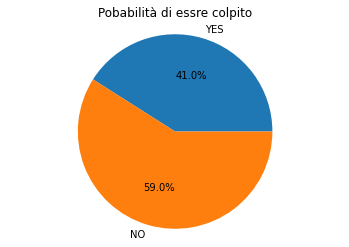

La probabilità di subire un danno pari a 0 Euro o inferiore a 10000 Euro : 79%

La probabilità di subire un danno compreso tra 10000 Euro e 49999 Euro è: 19%

La probabilità di subire un danno compreso tra 50000 Euro e 199999 Euro è: 2%

La probabilità di subire un danno uguale o superiore a 200000 Euro è: 0%



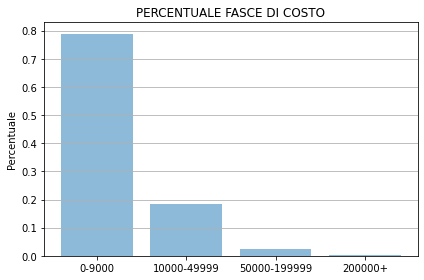

In [17]:
                                             ##CONTROLLO DELLE RISPOSTE##

if dimension_choice.value == '20-49':
    small = 1
    numero = float(dimension_value.value)
elif dimension_choice.value == '50-199':
    medium_low = 1
    numero = float(dimension_value.value)
elif dimension_choice.value == '200-499':
    medium_high = 1
    numero = float(dimension_value.value)
else:
    numero = float(dimension_value.value)

numero_square = numero**2
turnover_emp = float(turnover_value.value)
turnover_emp_square = float(turnover_value.value)**2
    
if location_choice.value == 'Sud o Isole':
    south = 1
        
if tech_choice.value == 'Alto/medio-alto':
    hightech = 1
        
if industrial_choice.value == 'Sì':
    industrial = 1
        
if ict_choice.value == 'Sì':
    ict = 1
elif ict_choice.value == 'No' and tech_choice.value == 'Alto/medio-alto':
    hightech_noict = 1
        
if export_choice.value == 'Tra 1/3 e 2/3':
    medium_exp = 1
elif export_choice.value == 'Più di 2/3':
    big_exp = 1
        
if cloud_choice.value == 'No':
    no_cloud == 1
        
if ai_choice.value == 'No':
    no_bigdata == 1
        
if iot_choice.value == 'No':
    no_iot = 1
        
share_skilled = (float(skill_choice.value))/100
    
if interruption_choice.value == False:
    no_interrupt = 1
        
if dataloss_choice.value == False:
    no_data_loss = 1
        
if extrawork_choice.value == False:
    no_extra_work = 1
        
if hard_choice.value == 'Sì':
    difficult = 1

    

    
    
                                             ##CALCOLO PROBABILITA'##

if share_skilled == 0:
    risultato = regr11(small, south, hightech, industrial, big_exp, medium_exp, difficult)
    print('La probabilità di essere colpito da un attacco informatico è: ' + str(round(risultato*100)) + '%\n')
elif share_skilled !=0 and cloud_choice.value == 'Non lo so' and ai_choice.value == 'Non lo so' and iot_choice == 'Non lo so':
    risultato = regr12(small, south, hightech, industrial, big_exp, medium_exp, difficult, share_skilled)
    print('La probabilità di essere colpito da un attacco informatico è: ' + str(round(risultato*100)) + '%\n')
else:
    risultato = regr13(small, south, hightech, industrial, big_exp, medium_exp, difficult, share_skilled, no_cloud, no_bigdata, no_iot)
    print('La probabilità di essere colpito da un attacco informatico è: ' + str(round(risultato*100)) + '%\n')


#GRAFICO 1 - il pie chart
%matplotlib inline

labels = ['YES', 'NO']
sizes = [round(risultato*100), round((1-risultato)*100)]

fig, ax = plt.subplots()
ax.pie(sizes,
       labels=labels,
       autopct='%1.1f%%',)
ax.axis('equal')
ax.set_title('Pobabilità di essre colpito')

plt.savefig('pie_plot.png')
plt.show()


    
p1 = regr21(small, medium_low, medium_high, numero, numero_square, south, ict, hightech_noict, industrial, turnover_emp, turnover_emp_square, no_interrupt, no_extra_work, no_data_loss)
p2 = regr22(small, medium_low, medium_high, numero, numero_square, south, ict, hightech_noict, industrial, turnover_emp, turnover_emp_square, no_interrupt, no_extra_work, no_data_loss)
p3 = regr23(small, medium_low, medium_high, numero, numero_square, south, ict, hightech_noict, industrial, turnover_emp, turnover_emp_square, no_interrupt, no_extra_work, no_data_loss)

prob3 = p3
prob2 = p2-p3
prob1 = p1-p2
prob0 = 1-p1

print('La probabilità di subire un danno pari a 0 Euro o inferiore a 10000 Euro : ' + str(round(prob0*100)) + '%\n')
print('La probabilità di subire un danno compreso tra 10000 Euro e 49999 Euro è: ' + str(round(prob1*100)) + '%\n')
print('La probabilità di subire un danno compreso tra 50000 Euro e 199999 Euro è: ' + str(round(prob2*100)) + '%\n')
print('La probabilità di subire un danno uguale o superiore a 200000 Euro è: ' + str(round(prob3*100)) + '%\n')



#GRAFICO 2 - Bar Chart
materials = ['0-9000', '10000-49999', '50000-199999', '200000+']
x_pos = np.arange(len(materials))
CTEs = [prob0, prob1, prob2, prob3]


fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, align='center', alpha=0.5)
ax.set_ylabel('Percentuale')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('PERCENTUALE FASCE DI COSTO')
ax.yaxis.grid(True)


plt.tight_layout()
plt.savefig('bar_plot.png')
plt.show()



#Serve a centrare i due grafici
HTML("""
    <style>
    .output_png{
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
    </style>
    """)
